# GO-CAM Model Statistics Analysis

This notebook analyzes statistical properties of GO-CAM models, focusing on:
- Distribution of number of activities per model
- Distribution of longest causal association paths
- Breakdown of these statistics by species

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict

# Set style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Data

In [2]:
# Load the flattened GO-CAM data
with open('../../data/gocam-flattened.slim.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

print(f"Total models loaded: {len(df)}")
print(f"\nColumns in dataset:")
print(df.columns.tolist())
print(f"\nFirst few rows:")
df.head()

Total models loaded: 1571

Columns in dataset:
['id', 'title', 'taxon', 'status', 'model_activity_part_of_rollup_label', 'model_activity_occurs_in_rollup_label', 'model_activity_enabled_by_terms_id', 'number_of_activities', 'length_of_longest_causal_association_path', 'number_of_strongly_connected_components']

First few rows:


,id,title,taxon,status,model_activity_part_of_rollup_label,model_activity_occurs_in_rollup_label,model_activity_enabled_by_terms_id,number_of_activities,length_of_longest_causal_association_path,number_of_strongly_connected_components
0,gomodel:56170d5200000012,kctd10 in heart development PMID:24430697,NCBITaxon:7955,production,[anatomical structure development],"[nucleus, nucleus, organelle]","[ZFIN:ZDB-GENE-991124-7, ZFIN:ZDB-GENE-020828-...",4,3.0,1.0
1,gomodel:568b0f9600000284,Antibacterial innate immune response in the in...,NCBITaxon:6239,production,"[immune system process, defense response to ot...","[nucleus, cytosol, nucleus, organelle, cytosol...","[WB:WBGene00006923, WB:WBGene00011979, WB:WBGe...",10,5.0,1.0
2,gomodel:5745387b00001516,Canonical glycolysis 1 (Mouse),NCBITaxon:10090,production,[generation of precursor metabolites and energ...,"[cytosol, cytosol]","[MGI:MGI:97555, MGI:MGI:95395, MGI:MGI:98797, ...",10,8.0,1.0
3,gomodel:57c82fad00000695,F13a1 and F13b-mouse-blood clotting,NCBITaxon:10090,production,"[wound healing, protein maturation]",NaN,"[MGI:MGI:1921395, MGI:MGI:88380, MGI:MGI:88379]",4,1.0,1.0
4,gomodel:586fc17a00000528,PRCD-human-retinitis pigmentosa,NCBITaxon:9606,production,[nervous system process],"[Golgi apparatus, Golgi apparatus, organelle]","[UniProtKB:Q00LT1, UniProtKB:Q9NYG2]",2,NaN,NaN


## Remove superpathways and odd trivial 2-step models

In [11]:
print("Filtering out superpathways and outliers...")
df = df[df['number_of_activities'] < 50]
print(f"Models after filtering out superpathways and outliers: {len(df)}")


Filtering out superpathways and outliers...
Models after filtering out superpathways and outliers: 1568


In [13]:
df = df[df['number_of_activities'] >= 3]
print(f"Models after filtering out trivial models with <3 activities: {len(df)}")

Models after filtering out trivial models with <3 activities: 1463


## Data Overview

In [14]:
# Basic statistics
print("Basic statistics for key metrics:")
print("\nNumber of activities:")
print(df['number_of_activities'].describe())

if 'length_of_longest_causal_association_path' in df.columns:
    print("\nLength of longest causal association path:")
    print(df['length_of_longest_causal_association_path'].describe())
else:
    print("\nNote: length_of_longest_causal_association_path not found in data")

# Check for species information
if 'taxon' in df.columns:
    print(f"\nNumber of unique taxa: {df['taxon'].nunique()}")
    print("\nTop 10 most common taxa:")
    print(df['taxon'].value_counts().head(10))

Basic statistics for key metrics:

Number of activities:
count    1463.000000
mean        6.455229
std         4.923826
min         3.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        42.000000
Name: number_of_activities, dtype: float64

Length of longest causal association path:
count    1259.000000
mean        3.128674
std         1.990269
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        24.000000
Name: length_of_longest_causal_association_path, dtype: float64

Number of unique taxa: 20

Top 10 most common taxa:
taxon
NCBITaxon:9606      855
NCBITaxon:10090     254
NCBITaxon:559292    166
NCBITaxon:4896       81
NCBITaxon:7227       65
NCBITaxon:7955       14
NCBITaxon:6239        4
NCBITaxon:10116       3
NCBITaxon:8355        2
NCBITaxon:425011      2
Name: count, dtype: int64


## Distribution of Number of Activities

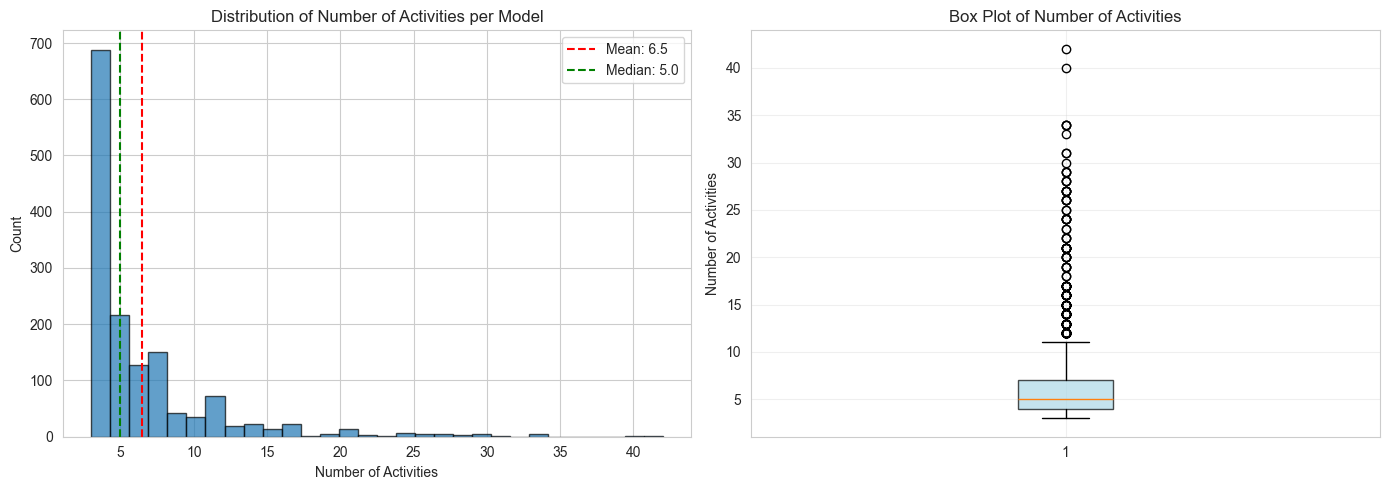

In [15]:
# Basic histogram of number_of_activities
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(df['number_of_activities'].dropna(), bins=30, edgecolor='black', alpha=0.7)
ax1.set_xlabel('Number of Activities')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Number of Activities per Model')
ax1.axvline(df['number_of_activities'].mean(), color='red', linestyle='--', label=f'Mean: {df["number_of_activities"].mean():.1f}')
ax1.axvline(df['number_of_activities'].median(), color='green', linestyle='--', label=f'Median: {df["number_of_activities"].median():.1f}')
ax1.legend()

# Box plot for better visualization of outliers
ax2.boxplot(df['number_of_activities'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7))
ax2.set_ylabel('Number of Activities')
ax2.set_title('Box Plot of Number of Activities')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Number of Activities by Species

/var/folders/nc/m4tx21912kv1b8nk3zzx9plr0000gn/T/ipykernel_58298/3568252266.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(species_activities_list, labels=species_names_short, patch_artist=True)


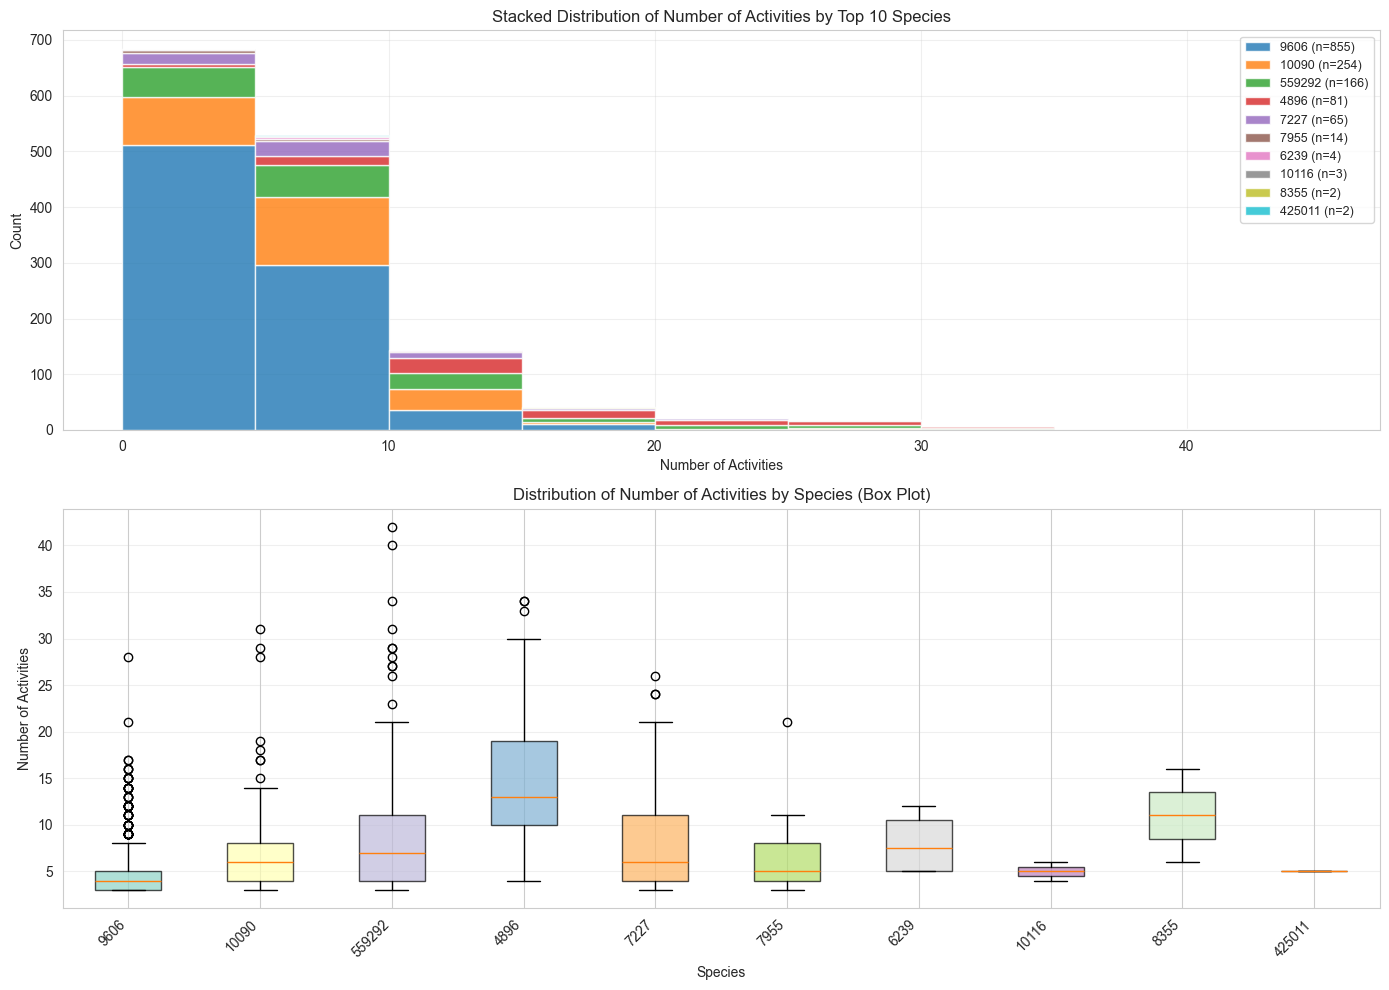


Summary statistics by species (top 10):
                  count   mean  median   std  min  max
taxon                                                 
NCBITaxon:9606      855   4.92     4.0  2.58    3   28
NCBITaxon:10090     254   6.73     6.0  4.11    3   31
NCBITaxon:559292    166   9.05     7.0  7.36    3   42
NCBITaxon:4896       81  14.57    13.0  7.66    4   34
NCBITaxon:7227       65   8.28     6.0  5.82    3   26
NCBITaxon:7955       14   6.57     5.0  4.91    3   21
NCBITaxon:6239        4   8.00     7.5  3.56    5   12
NCBITaxon:10116       3   5.00     5.0  1.00    4    6
NCBITaxon:425011      2   5.00     5.0  0.00    5    5
NCBITaxon:8355        2  11.00    11.0  7.07    6   16


In [16]:
# Prepare data for stacked histogram by species
if 'taxon' in df.columns:
    # Get top species by model count
    top_species = df['taxon'].value_counts().head(10).index
    
    # Filter data for top species
    df_top_species = df[df['taxon'].isin(top_species)].copy()
    
    # Create bins for activities
    bins = np.arange(0, df['number_of_activities'].max() + 5, 5)
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Stacked histogram
    species_data = []
    species_labels = []
    
    for species in top_species:
        species_activities = df_top_species[df_top_species['taxon'] == species]['number_of_activities'].dropna()
        if len(species_activities) > 0:
            species_data.append(species_activities)
            # Extract species name from full taxon string if it's in CURIE format
            species_name = species.split(':')[-1] if ':' in species else species
            species_labels.append(f"{species_name} (n={len(species_activities)})")
    
    # Create stacked histogram
    ax1.hist(species_data, bins=bins, label=species_labels, stacked=True, alpha=0.8)
    ax1.set_xlabel('Number of Activities')
    ax1.set_ylabel('Count')
    ax1.set_title('Stacked Distribution of Number of Activities by Top 10 Species')
    ax1.legend(loc='upper right', fontsize=9)
    ax1.grid(True, alpha=0.3)
    
    # Box plot by species
    species_activities_list = []
    species_names_short = []
    
    for species in top_species[:10]:  # Limit to top 10 for readability
        species_activities = df_top_species[df_top_species['taxon'] == species]['number_of_activities'].dropna()
        if len(species_activities) > 0:
            species_activities_list.append(species_activities)
            species_name = species.split(':')[-1] if ':' in species else species
            species_names_short.append(species_name[:20])  # Truncate long names
    
    bp = ax2.boxplot(species_activities_list, labels=species_names_short, patch_artist=True)
    
    # Color the boxes
    colors = plt.cm.Set3(np.linspace(0, 1, len(species_activities_list)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax2.set_xlabel('Species')
    ax2.set_ylabel('Number of Activities')
    ax2.set_title('Distribution of Number of Activities by Species (Box Plot)')
    ax2.grid(True, alpha=0.3, axis='y')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics by species
    print("\nSummary statistics by species (top 10):")
    summary_stats = df_top_species.groupby('taxon')['number_of_activities'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    summary_stats = summary_stats.sort_values('count', ascending=False)
    print(summary_stats.round(2))
else:
    print("No taxon column found in the data")

## Distribution of Longest Causal Association Path

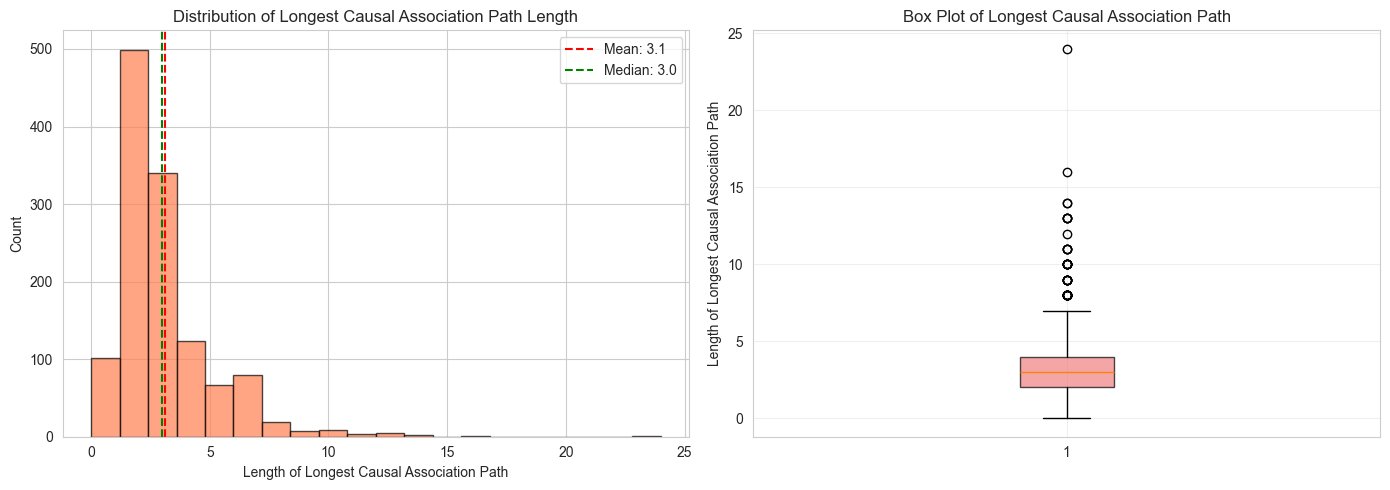


Distribution of causal path lengths:
length_of_longest_causal_association_path
0.0       1
1.0     101
2.0     499
3.0     340
4.0     123
5.0      67
6.0      48
7.0      32
8.0      19
9.0       7
10.0      9
11.0      4
12.0      1
13.0      4
14.0      2
16.0      1
24.0      1
Name: count, dtype: int64


In [17]:
# Check if the column exists and create visualizations
if 'length_of_longest_causal_association_path' in df.columns:
    # Basic histogram of longest causal path
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Filter out NaN values
    causal_path_data = df['length_of_longest_causal_association_path'].dropna()
    
    # Histogram
    ax1.hist(causal_path_data, bins=20, edgecolor='black', alpha=0.7, color='coral')
    ax1.set_xlabel('Length of Longest Causal Association Path')
    ax1.set_ylabel('Count')
    ax1.set_title('Distribution of Longest Causal Association Path Length')
    ax1.axvline(causal_path_data.mean(), color='red', linestyle='--', label=f'Mean: {causal_path_data.mean():.1f}')
    ax1.axvline(causal_path_data.median(), color='green', linestyle='--', label=f'Median: {causal_path_data.median():.1f}')
    ax1.legend()
    
    # Box plot
    ax2.boxplot(causal_path_data, vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', alpha=0.7))
    ax2.set_ylabel('Length of Longest Causal Association Path')
    ax2.set_title('Box Plot of Longest Causal Association Path')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Value counts for path lengths
    print("\nDistribution of causal path lengths:")
    path_counts = causal_path_data.value_counts().sort_index()
    print(path_counts)
else:
    print("Column 'length_of_longest_causal_association_path' not found in the data")

## Longest Causal Association Path by Species

/var/folders/nc/m4tx21912kv1b8nk3zzx9plr0000gn/T/ipykernel_58298/1244274215.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax2.boxplot(species_paths_list, labels=species_names_short, patch_artist=True)


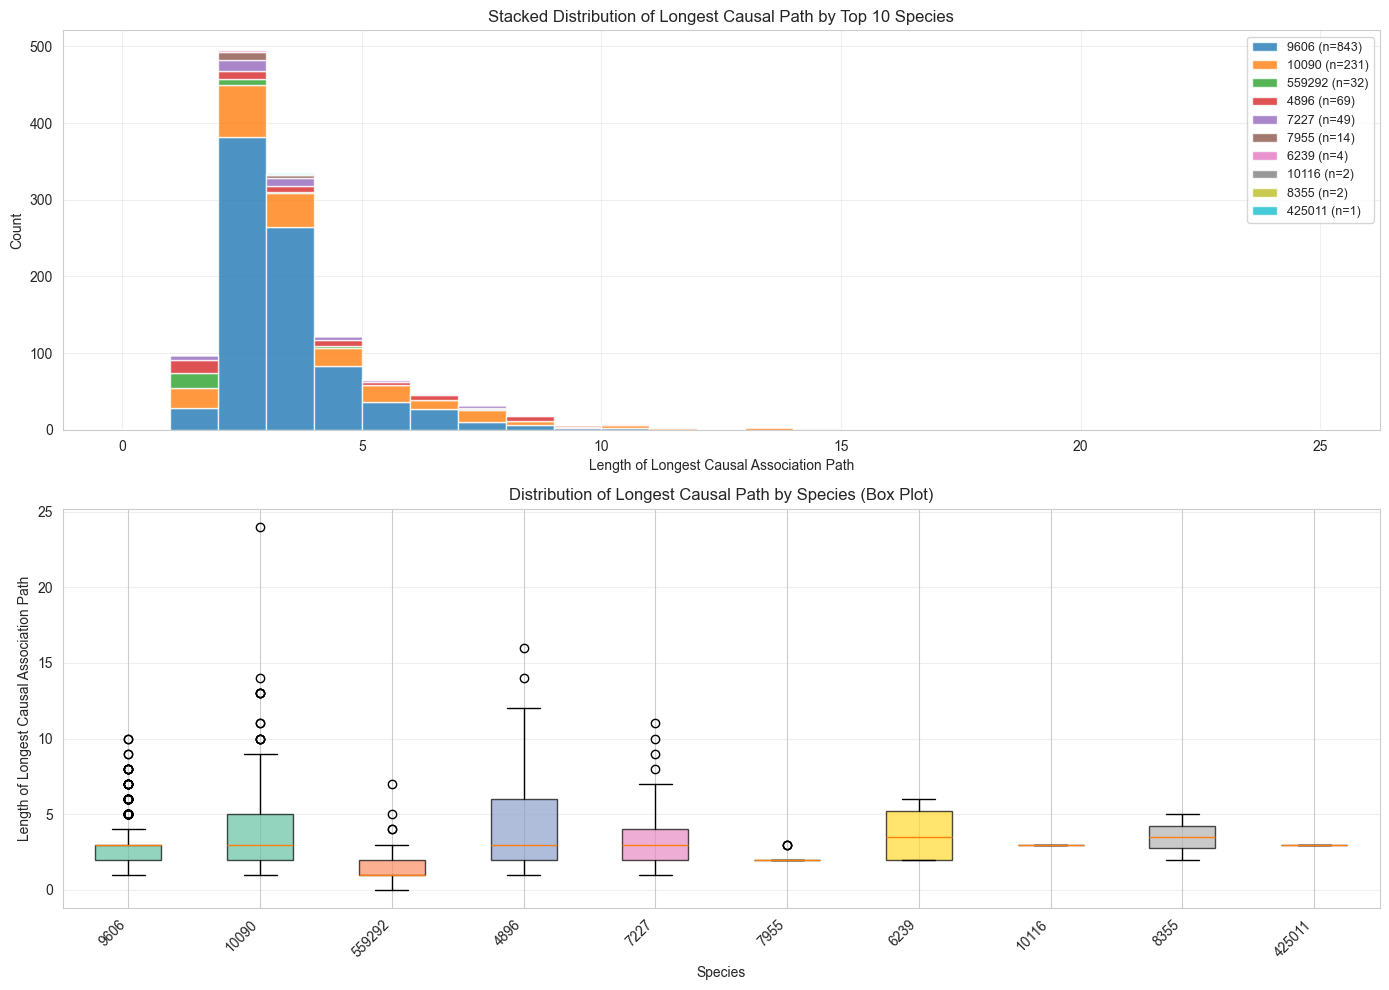


Summary statistics of causal paths by species (top 10):
                  count  mean  median   std  min   max
taxon                                                 
NCBITaxon:9606      843  2.88     3.0  1.32  1.0  10.0
NCBITaxon:10090     231  3.86     3.0  2.92  1.0  24.0
NCBITaxon:4896       69  4.30     3.0  3.45  1.0  16.0
NCBITaxon:7227       49  3.59     3.0  2.47  1.0  11.0
NCBITaxon:559292     32  1.75     1.0  1.44  0.0   7.0
NCBITaxon:7955       14  2.21     2.0  0.43  2.0   3.0
NCBITaxon:6239        4  3.75     3.5  2.06  2.0   6.0
NCBITaxon:10116       2  3.00     3.0  0.00  3.0   3.0
NCBITaxon:8355        2  3.50     3.5  2.12  2.0   5.0
NCBITaxon:425011      1  3.00     3.0   NaN  3.0   3.0


In [18]:
# Stacked histogram by species for causal paths
if 'length_of_longest_causal_association_path' in df.columns and 'taxon' in df.columns:
    # Get top species by model count
    top_species = df['taxon'].value_counts().head(10).index
    
    # Filter data for top species
    df_top_species = df[df['taxon'].isin(top_species)].copy()
    
    # Create bins for path lengths
    max_path = df['length_of_longest_causal_association_path'].max()
    if pd.notna(max_path):
        bins = np.arange(0, max_path + 2, 1)
    else:
        bins = np.arange(0, 11, 1)  # Default bins if all values are NaN
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Prepare data for stacked histogram
    species_data = []
    species_labels = []
    
    for species in top_species:
        species_paths = df_top_species[df_top_species['taxon'] == species]['length_of_longest_causal_association_path'].dropna()
        if len(species_paths) > 0:
            species_data.append(species_paths)
            species_name = species.split(':')[-1] if ':' in species else species
            species_labels.append(f"{species_name} (n={len(species_paths)})")
    
    if species_data:
        # Create stacked histogram
        ax1.hist(species_data, bins=bins, label=species_labels, stacked=True, alpha=0.8)
        ax1.set_xlabel('Length of Longest Causal Association Path')
        ax1.set_ylabel('Count')
        ax1.set_title('Stacked Distribution of Longest Causal Path by Top 10 Species')
        ax1.legend(loc='upper right', fontsize=9)
        ax1.grid(True, alpha=0.3)
        
        # Box plot by species
        species_paths_list = []
        species_names_short = []
        
        for species in top_species[:10]:
            species_paths = df_top_species[df_top_species['taxon'] == species]['length_of_longest_causal_association_path'].dropna()
            if len(species_paths) > 0:
                species_paths_list.append(species_paths)
                species_name = species.split(':')[-1] if ':' in species else species
                species_names_short.append(species_name[:20])
        
        if species_paths_list:
            bp = ax2.boxplot(species_paths_list, labels=species_names_short, patch_artist=True)
            
            # Color the boxes
            colors = plt.cm.Set2(np.linspace(0, 1, len(species_paths_list)))
            for patch, color in zip(bp['boxes'], colors):
                patch.set_facecolor(color)
                patch.set_alpha(0.7)
            
            ax2.set_xlabel('Species')
            ax2.set_ylabel('Length of Longest Causal Association Path')
            ax2.set_title('Distribution of Longest Causal Path by Species (Box Plot)')
            ax2.grid(True, alpha=0.3, axis='y')
            plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    else:
        ax1.text(0.5, 0.5, 'No data available for visualization', ha='center', va='center', transform=ax1.transAxes)
        ax2.text(0.5, 0.5, 'No data available for visualization', ha='center', va='center', transform=ax2.transAxes)
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics by species
    if 'length_of_longest_causal_association_path' in df_top_species.columns:
        print("\nSummary statistics of causal paths by species (top 10):")
        summary_stats = df_top_species.groupby('taxon')['length_of_longest_causal_association_path'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
        summary_stats = summary_stats.sort_values('count', ascending=False)
        print(summary_stats.round(2))
else:
    print("Cannot create stacked histogram: missing required columns")

## Correlation Analysis

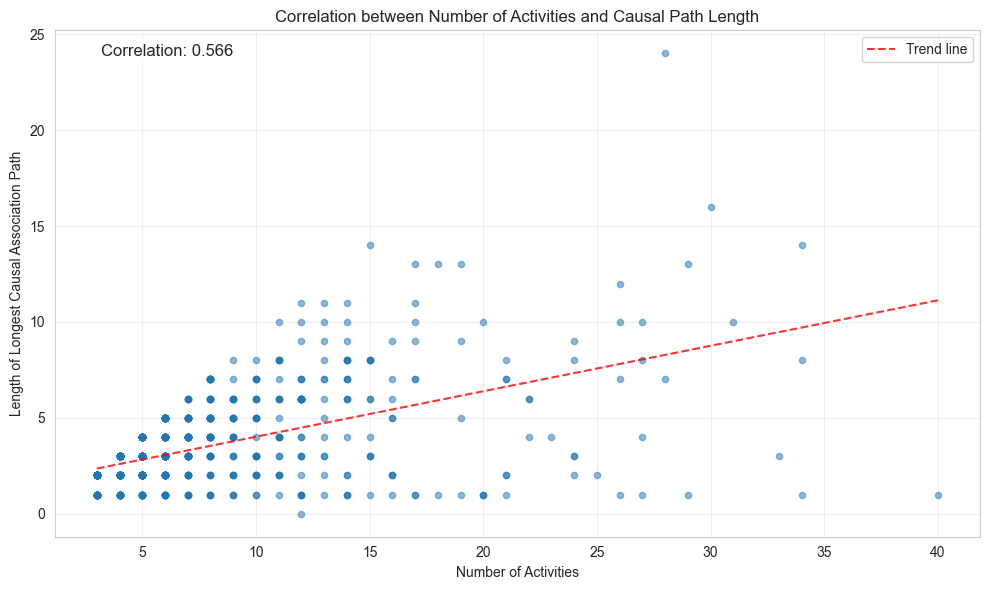


Pearson correlation coefficient: 0.566
Number of models with both metrics: 1259


In [19]:
# Analyze correlation between number of activities and causal path length
if 'length_of_longest_causal_association_path' in df.columns:
    # Create scatter plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Filter out NaN values
    valid_data = df[['number_of_activities', 'length_of_longest_causal_association_path']].dropna()
    
    if len(valid_data) > 0:
        ax.scatter(valid_data['number_of_activities'], 
                  valid_data['length_of_longest_causal_association_path'],
                  alpha=0.5, s=20)
        
        # Add trend line
        z = np.polyfit(valid_data['number_of_activities'], 
                       valid_data['length_of_longest_causal_association_path'], 1)
        p = np.poly1d(z)
        ax.plot(valid_data['number_of_activities'].sort_values(), 
                p(valid_data['number_of_activities'].sort_values()),
                "r--", alpha=0.8, label='Trend line')
        
        ax.set_xlabel('Number of Activities')
        ax.set_ylabel('Length of Longest Causal Association Path')
        ax.set_title('Correlation between Number of Activities and Causal Path Length')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Calculate correlation
        correlation = valid_data['number_of_activities'].corr(valid_data['length_of_longest_causal_association_path'])
        ax.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                transform=ax.transAxes, fontsize=12,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nPearson correlation coefficient: {correlation:.3f}")
        print(f"Number of models with both metrics: {len(valid_data)}")
    else:
        print("No valid data points for correlation analysis")
else:
    print("Cannot perform correlation analysis: 'length_of_longest_causal_association_path' not found")

## Summary Statistics

In [20]:
# Overall summary
print("=" * 50)
print("OVERALL SUMMARY")
print("=" * 50)

print(f"\nTotal number of GO-CAM models: {len(df)}")

print("\n--- Number of Activities ---")
print(f"Mean: {df['number_of_activities'].mean():.2f}")
print(f"Median: {df['number_of_activities'].median():.0f}")
print(f"Std Dev: {df['number_of_activities'].std():.2f}")
print(f"Min: {df['number_of_activities'].min():.0f}")
print(f"Max: {df['number_of_activities'].max():.0f}")
print(f"Models with >10 activities: {(df['number_of_activities'] > 10).sum()} ({(df['number_of_activities'] > 10).sum() / len(df) * 100:.1f}%)")

if 'length_of_longest_causal_association_path' in df.columns:
    print("\n--- Longest Causal Association Path ---")
    path_data = df['length_of_longest_causal_association_path'].dropna()
    if len(path_data) > 0:
        print(f"Mean: {path_data.mean():.2f}")
        print(f"Median: {path_data.median():.0f}")
        print(f"Std Dev: {path_data.std():.2f}")
        print(f"Min: {path_data.min():.0f}")
        print(f"Max: {path_data.max():.0f}")
        print(f"Models with path length >3: {(path_data > 3).sum()} ({(path_data > 3).sum() / len(path_data) * 100:.1f}%)")
        print(f"Models with valid path data: {len(path_data)} ({len(path_data) / len(df) * 100:.1f}%)")

if 'taxon' in df.columns:
    print("\n--- Species Distribution ---")
    print(f"Total unique taxa: {df['taxon'].nunique()}")
    print(f"Models with taxon information: {df['taxon'].notna().sum()} ({df['taxon'].notna().sum() / len(df) * 100:.1f}%)")
    
print("\n" + "=" * 50)

OVERALL SUMMARY

Total number of GO-CAM models: 1463

--- Number of Activities ---
Mean: 6.46
Median: 5
Std Dev: 4.92
Min: 3
Max: 42
Models with >10 activities: 204 (13.9%)

--- Longest Causal Association Path ---
Mean: 3.13
Median: 3
Std Dev: 1.99
Min: 0
Max: 24
Models with path length >3: 318 (25.3%)
Models with valid path data: 1259 (86.1%)

--- Species Distribution ---
Total unique taxa: 20
Models with taxon information: 1456 (99.5%)

